---

## 시간 복잡도 : 연산 횟수 대비 걸리는 시간,  Big-O 계산법(최악의 수 계산법)
## 공간 복잡도 : 알고리즘의 메모리 사용량, Big-O 노테인션 계산법
## 모델 복잡도 : "같은 현상을 설명하는 두 개의 주장이 있다면 간단한 쪽을 선택하라"
## (가능하면 앙상블보단 하나)

https://lgphone.tistory.com/46

---

### [1] 데이터 불러오기

In [27]:
## [1] 데이터 불러오기
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
train_data = data[0][0]
train_target = data[0][1]
test_data = data[1][0]
test_target = data[1][1]

In [29]:
train_images = train_data / 255.0
test_images = test_data / 255.0

### [2] 모델 돌려보기
https://codetorial.net/tensorflow/fashion_mnist_classification.html

In [30]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# 5. 모델 훈련
model.fit(train_data, train_target)

1875/1875 [==============================] - 11s 6ms/step - loss: 3.5162 - accuracy: 0.7552


In [33]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(train_data, train_target)
print(loss, accuracy)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6700 - accuracy: 0.7673
0.6699897646903992 0.7672833204269409


In [34]:
import numpy as np

predictions = model.predict(test_data)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 3ms/step
[2.6299728e-18 1.7296645e-21 1.8473678e-28 2.9844968e-17 3.8739930e-21
 5.8576057e-04 8.4216292e-18 4.0252745e-02 7.6428831e-21 9.5916152e-01]
9


In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [36]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [37]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


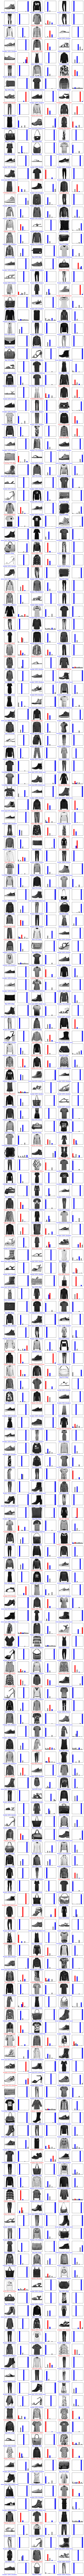

In [38]:
num_rows = 200
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_target, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_target)
plt.show()